In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image

# Our imports
from helper.loading import *
from helper.image import *
from helper.visualisations import *
from models.features_extraction import *
from models.predictions import *
from models.post_processing import *

In [2]:
# Path constant
root_dir = "data/"
training_dir = root_dir +"training/"
image_dir = training_dir + "images/"
gt_dir = training_dir + "groundtruth/"

# Load a set of images
imgs, gt_imgs = load_images_and_groundtruth(image_dir, gt_dir)

Loaded 100 images
All images have the same size !
Image size = 400, 400


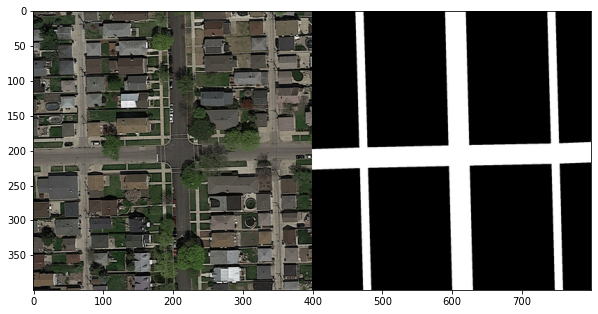

In [3]:
# Show first image and its groundtruth image
display_imgs_side_by_side(imgs[0], gt_imgs[0])

In [4]:
# Split in train and test set
img_train, gt_train, img_test, gt_test = split_data(imgs, gt_imgs, 0.8)

In [7]:
# Extract patches from input images
patch_size = 16 # each patch is 16*16 pixels
img_patches, gt_patches = get_imgs_gt_patches(img_train, gt_train, patch_size)
print(img_patches.shape, gt_patches.shape)

(50000, 16, 16, 3) (50000, 16, 16)


In [8]:
# Extract features and class from patches
X = np.asarray([extract_features_2d(img_patches[i]) for i in range(len(img_patches))])
Y = np.asarray([value_to_class(np.mean(gt_patches[i])) for i in range(len(gt_patches))])

In [9]:
# Print feature statistics
print('Computed ' + str(X.shape[0]) + ' features')
print('Feature dimension = ' + str(X.shape[1]))
print('Number of classes = ' + str(np.max(Y)))  #TODO: fix, length(unique(Y)) 

Y0 = [i for i, j in enumerate(Y) if j == 0]
Y1 = [i for i, j in enumerate(Y) if j == 1]
print('Class 0: ' + str(len(Y0)) + ' samples')
print('Class 1: ' + str(len(Y1)) + ' samples')

Computed 50000 features
Feature dimension = 2
Number of classes = 1
Class 0: 36989 samples
Class 1: 13011 samples


In [10]:
#Test model
from sklearn import linear_model

# we create an instance of the classifier and fit the data
logreg = linear_model.LogisticRegression(C=1e5, class_weight="balanced")
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight='balanced')

In [11]:
# Run prediction on the img_idx-th image
img_idx = 12
test = img_test[img_idx]
#Add new axis if we want to predict on only one image (the method made to predict an array of images)
test = test[np.newaxis,:,:]
pred = predict_test_set(test, logreg, patch_size)

In [12]:
# Display prediction as an image
w = gt_imgs[img_idx].shape[0]
h = gt_imgs[img_idx].shape[1]
predicted_im = label_to_img(w, h, patch_size, patch_size, pred)

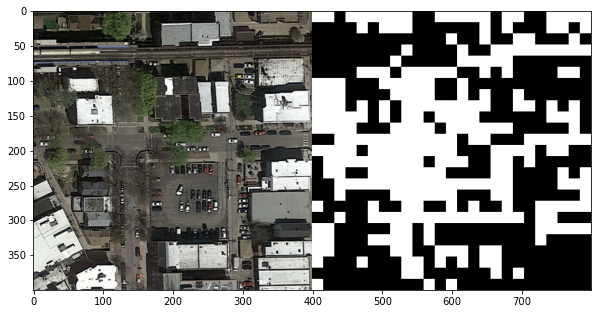

In [13]:
display_imgs_side_by_side(img_test[img_idx], predicted_im)

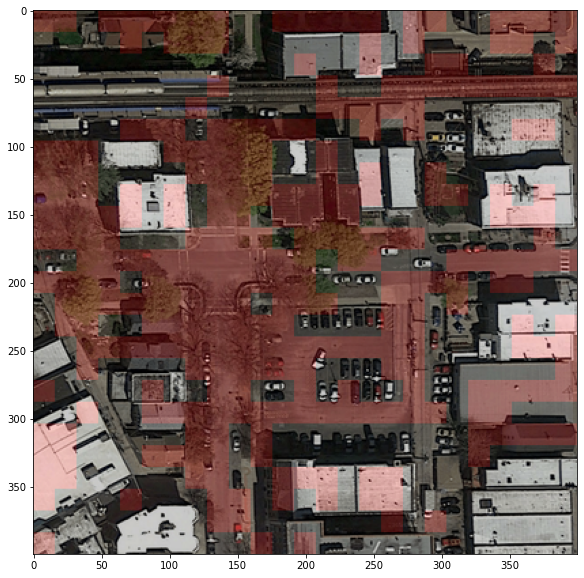

In [14]:
new_img = make_img_overlay(img_test[img_idx], predicted_im)